# Lab 3 – Task 1: Translation

Translation shifts an image by adjusting pixel coordinates.

The OpenCV 2×3 transformation matrix is:

$$T = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

- `tx` > 0 → shift right, `tx` < 0 → shift left  
- `ty` > 0 → shift down,  `ty` < 0 → shift up

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (replace path with 'lena.png' if available)
image = cv2.imread('image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w = image.shape[:2]
print(f'Image shape: {image.shape}')

Image shape: (173, 291, 3)


## Original Example – Shift 100 px right, 50 px down

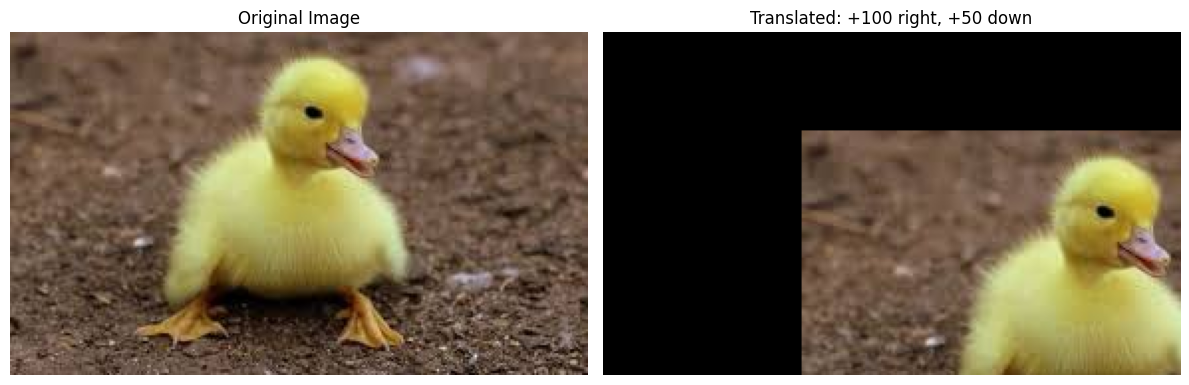

Translated image shape: (173, 291, 3)


In [5]:
# Original example from the lab
translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
translated_image = cv2.warpAffine(image, translation_matrix, (w, h))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Translated: +100 right, +50 down')
axes[1].axis('off')

plt.tight_layout()
plt.show()
print(f'Translated image shape: {translated_image.shape}')

## Task 1.1 – Experiment with Different Translations

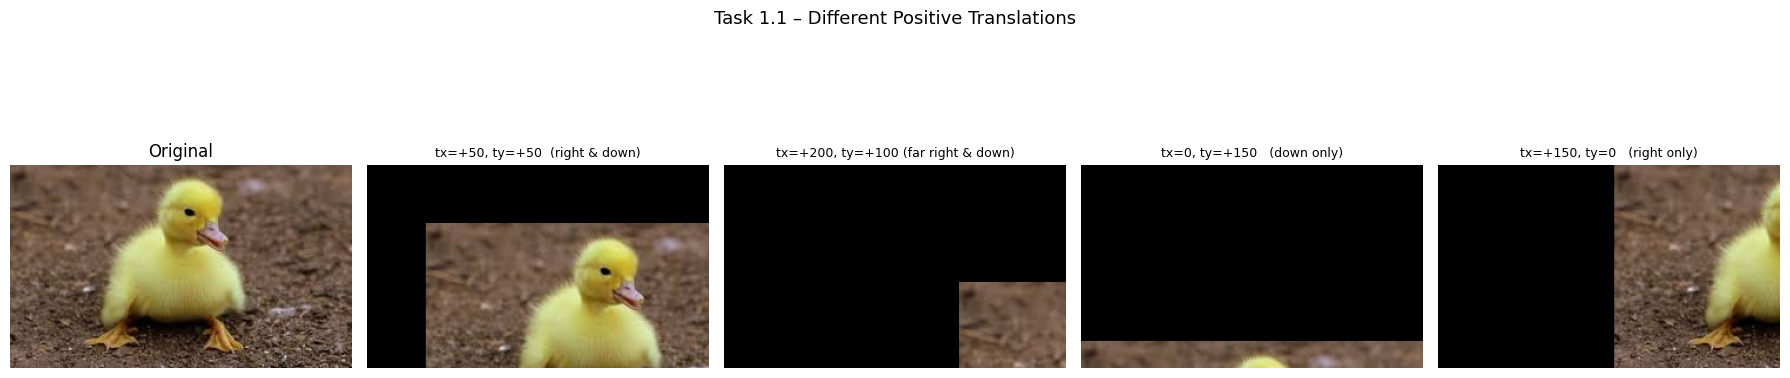

In [6]:
# Different translation values
translations = [
    (50,  50,  'tx=+50, ty=+50  (right & down)'),
    (200, 100, 'tx=+200, ty=+100 (far right & down)'),
    (0,   150, 'tx=0, ty=+150   (down only)'),
    (150, 0,   'tx=+150, ty=0   (right only)'),
]

fig, axes = plt.subplots(1, len(translations) + 1, figsize=(18, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

for idx, (tx, ty, title) in enumerate(translations):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    result = cv2.warpAffine(image, M, (w, h))
    axes[idx + 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[idx + 1].set_title(title, fontsize=9)
    axes[idx + 1].axis('off')

plt.suptitle('Task 1.1 – Different Positive Translations', fontsize=13)
plt.tight_layout()
plt.show()

## Task 1.2 – Negative Shifts (Moving the Image Left or Up)

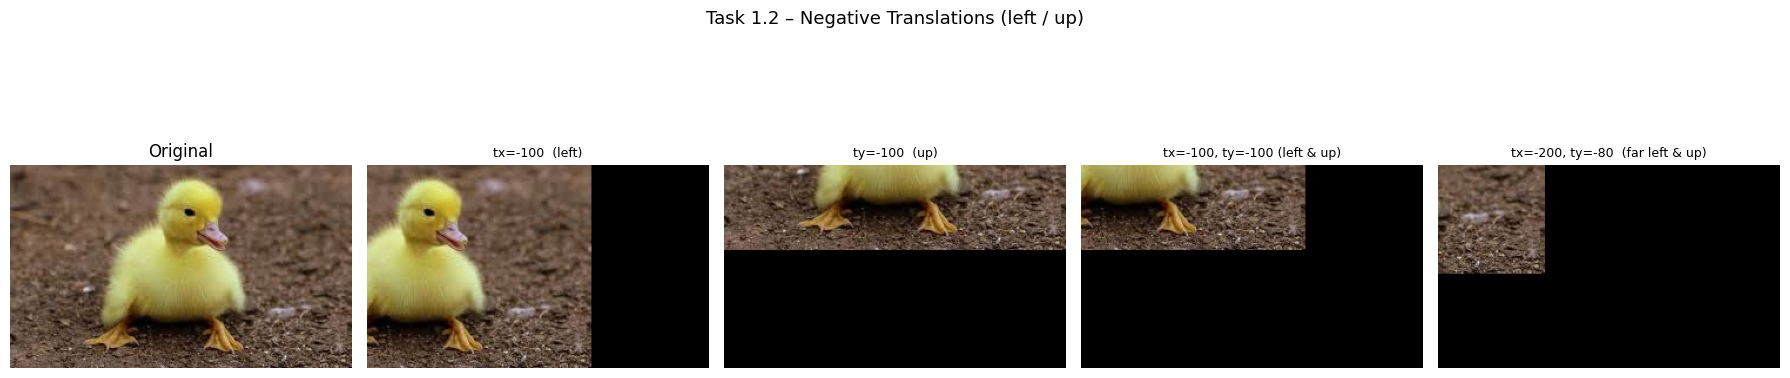

In [7]:
# Negative translation values
import matplotlib.pyplot as plt

neg_translations = [
    (-100,    0, 'tx=-100  (left)'),
    (   0, -100, 'ty=-100  (up)'),
    (-100, -100, 'tx=-100, ty=-100 (left & up)'),
    (-200,  -80, 'tx=-200, ty=-80  (far left & up)'),
]

fig, axes = plt.subplots(1, len(neg_translations) + 1, figsize=(18, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

for idx, (tx, ty, title) in enumerate(neg_translations):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    result = cv2.warpAffine(image, M, (w, h))
    axes[idx + 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[idx + 1].set_title(title, fontsize=9)
    axes[idx + 1].axis('off')

plt.suptitle('Task 1.2 – Negative Translations (left / up)', fontsize=13)
plt.tight_layout()
plt.show()

## Summary

- Positive `tx` shifts the image to the **right**; negative `tx` shifts it to the **left** (the vacated area on the opposite side becomes black/zero).
- Positive `ty` shifts the image **down**; negative `ty` shifts it **up**.
- The output canvas size stays fixed (`w × h`), so any part of the image shifted outside the frame is **cropped**.
- Large translations move most of the content off-screen, leaving large black borders.